# Make shapefile out of polygons that ran

This notebook checks whether the wetland polygon drill ran on all the polygons in the input shapefile.

_inputs_  
- a csv saved from the QGIS attribute table of the original shapefile
- path to the output directory containing results for each shapefile
- somewhere to save the output shapefile

load some modules

In [1]:
import xarray as xr
import pandas as pd
import csv
import os
import fiona
from shapely.geometry import shape
import geopandas as gpd
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap

where is my csv?

In [2]:
path_to_csv_attribute_table = '/g/data/r78/rjd547/DES-QLD_Project/data/Wet_WGS84_P_attrs.csv'
#path_to_csv_attribute_table = '/g/data/r78/rjd547/DES-QLD_Project/data/Wet_WGS84_L_attrs.csv'
path_to_shapefile = '/g/data/r78/rjd547/DES-QLD_Project/data/Wet_WGS84_P.shp'

read in the csv using pandas

In [3]:
starting_polys = pd.read_csv(path_to_csv_attribute_table)

## make a list of the files that ran

In [4]:
polys_run = []
#for each file in the output directory
for file in os.listdir('/g/data/r78/rjd547/DES-QLD_Project/pal_1/'):
    #if it's a csv file
    if file.endswith(".csv"):
        #add it to our list
        polys_run.append(file)  

## Get the polyName by removing the file extension

In [5]:
#get list of runs
run_list = []
for i in polys_run:
    i = i.split('.') #break up filename
    i = i[0] #get first bit
    run_list.append(i)

## How many wetlands did it run for?

In [6]:
len(run_list)

15535

## How many wetlands didn't it run for?

In [7]:
len(starting_polys)-len(run_list)

27239

### this is the function used in the WIT to get the shapefile name. if we apply this to our input shapefile, we can retrieve the list of polygons that the code should have run for.

In [8]:
def get_polyName(feature):
    'function for QLD shapefile types'
    ID = feature['properties']['OBJECTID']
    CATCHMENT = feature['properties']['CATCHMENT']
    HAB = feature['properties']['HAB']
    polyName = f'{ID}_{CATCHMENT}_{HAB}'
    #print(f'processing polygon {polyName}')
    return(polyName)

In [9]:
in_polys_list=[]
with fiona.open(path_to_shapefile) as starting_shapefile:
    for shapes in starting_shapefile:   
        #print(shapes['properties'])
        polyName=get_polyName(shapes)
        in_polys_list.append(polyName)

In [10]:
len(in_polys_list)

42774

In [11]:
missing_runs = set(in_polys_list) - set(run_list)

#print(missing_runs)

In [12]:
#turn the set of missing runs back into a list
missing_runs = list(missing_runs)

In [13]:
len(missing_runs)

27239

In [14]:
missing_runs[0:5]

['27562_EYRE_CREEK_11b',
 '55482_MAROOCHY_RIVER_4a',
 '30153_EYRE_CREEK_11b',
 '32547_EYRE_CREEK_12c',
 '12554_DIAMANTINA_RIVER_12c']

open the original shapefile. Use the index ['id'] of the missing runs to select the polygons from the shapefile. Write the selected missing polygons out into a new shapefile.

In [15]:
with fiona.open(path_to_shapefile) as inshape:
    meta=inshape.meta
    with fiona.open('/g/data/r78/rjd547/DES-QLD_Project/Pal_notrun_v1.shp','w',**meta) as outshape:
        for feature in inshape:
            ID = feature['properties']['OBJECTID']
            CATCHMENT = feature['properties']['CATCHMENT']
            HAB = feature['properties']['HAB']
            polyName = f'{ID}_{CATCHMENT}_{HAB}'
            print(polyName)
            if polyName in missing_runs:
                #print(feature['properties']['OBJECTID'])   
                outshape.write(feature)        

65538_EDWARD_RIVER_2a
65539_EDWARD_RIVER_2a
65540_EDWARD_RIVER_2a
65541_EDWARD_RIVER_2a
65542_EDWARD_RIVER_2a
65543_EDWARD_RIVER_2a
65544_EDWARD_RIVER_2a
65545_EDWARD_RIVER_2a
65546_EDWARD_RIVER_2a
65547_EDWARD_RIVER_2a
65548_EDWARD_RIVER_2a
65549_EDWARD_RIVER_2a
65550_EDWARD_RIVER_2a
65551_EDWARD_RIVER_2a
65552_EDWARD_RIVER_2a
65553_EDWARD_RIVER_4a
65554_EDWARD_RIVER_4a
65555_EDWARD_RIVER_4a
65556_EDWARD_RIVER_4a
65557_EDWARD_RIVER_4a
65558_EDWARD_RIVER_4a
65559_EDWARD_RIVER_4a
65560_EDWARD_RIVER_4a
65561_EDWARD_RIVER_4a
65562_EDWARD_RIVER_4a
65563_EDWARD_RIVER_4a
65564_EDWARD_RIVER_4a
65565_EDWARD_RIVER_4a
65566_EDWARD_RIVER_4a
65567_EDWARD_RIVER_4a
65568_EDWARD_RIVER_4a
65569_EDWARD_RIVER_4a
65570_EDWARD_RIVER_4a
65571_EDWARD_RIVER_4a
65572_EDWARD_RIVER_4a
65573_EDWARD_RIVER_4a
65574_EDWARD_RIVER_4a
65575_EDWARD_RIVER_4a
65576_EDWARD_RIVER_4a
65577_EDWARD_RIVER_4a
65578_EDWARD_RIVER_4a
65579_EDWARD_RIVER_4a
65580_EDWARD_RIVER_4a
65581_EDWARD_RIVER_4a
65582_EDWARD_RIVER_4a
65583_EDWA

open the original shapefile. Use the index ['id'] of the runs to select the polygons from the shapefile. Write the selected missing polygons out into a new shapefile.

In [16]:
run_list[0:10]

['70544_EDWARD_RIVER_2a',
 '71513_EDWARD_RIVER_2a',
 '5331_DIAMANTINA_RIVER_11b',
 '75565_KENDALL_RIVER_2a',
 '6607_DIAMANTINA_RIVER_11b',
 '5421_DIAMANTINA_RIVER_11b',
 '11322_DIAMANTINA_RIVER_12c',
 '71512_EDWARD_RIVER_2a',
 '7370_DIAMANTINA_RIVER_11b',
 '5753_DIAMANTINA_RIVER_11b']

In [17]:
#this time we just create a json file of the actual runs
with fiona.open(path_to_shapefile) as inshape:
    meta=inshape.meta
    with fiona.open('/g/data/r78/rjd547/DES-QLD_Project/Pal_run_v1.shp','w',**meta) as outshape:
        for feature in inshape:
            ID = feature['properties']['OBJECTID']
            CATCHMENT = feature['properties']['CATCHMENT']
            HAB = feature['properties']['HAB']
            polyName = f'{ID}_{CATCHMENT}_{HAB}'
            if polyName in run_list:
                #print(polyName)   
                outshape.write(feature)            

open the new shapefile to check what was written out as a new shapefile.

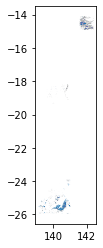

In [19]:
outshape_written = gpd.read_file('/g/data/r78/rjd547/DES-QLD_Project/Pal_run_v1.shp')
outshape_written.plot()
plt.show()